In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
ds=pd.read_csv("Wine_clust.csv")

In [3]:
ds.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
ds.shape

(178, 13)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
ds.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
ds.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Data Preprocessing

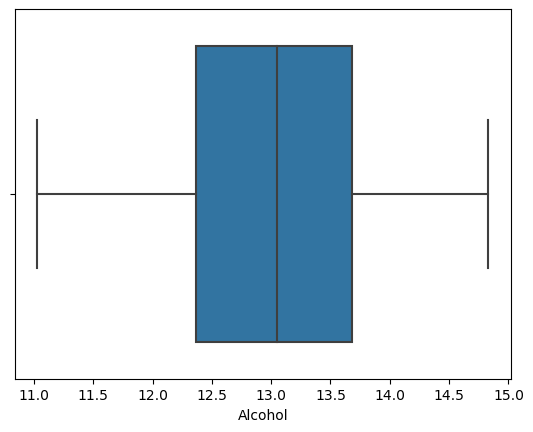

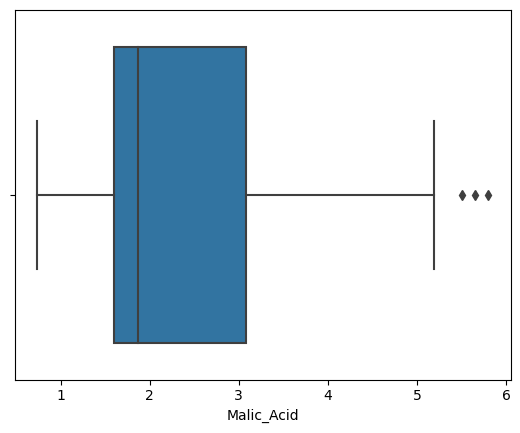

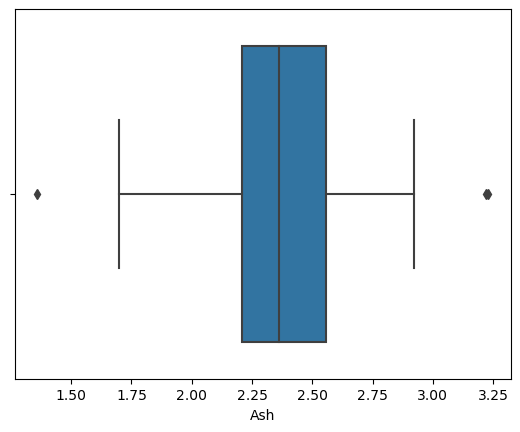

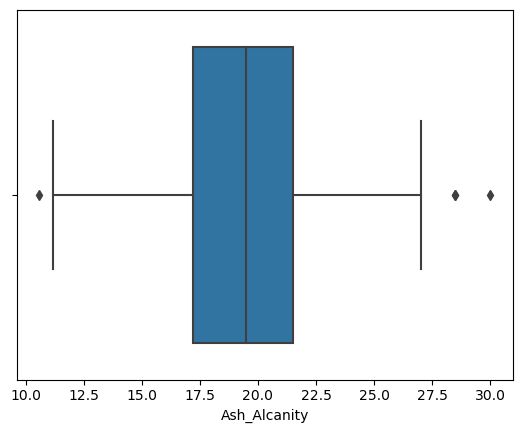

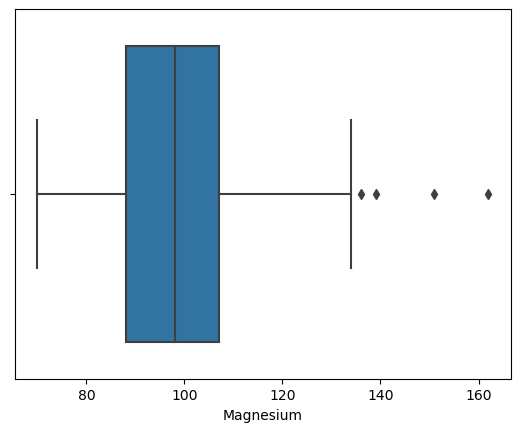

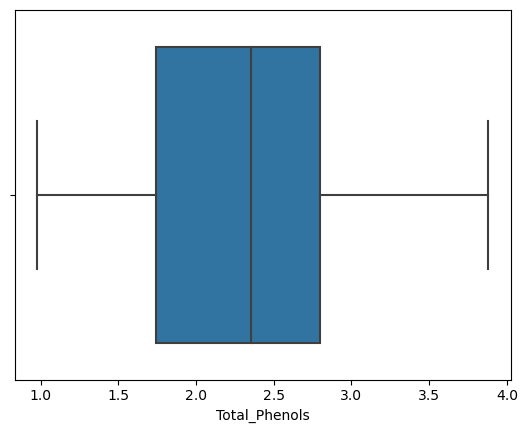

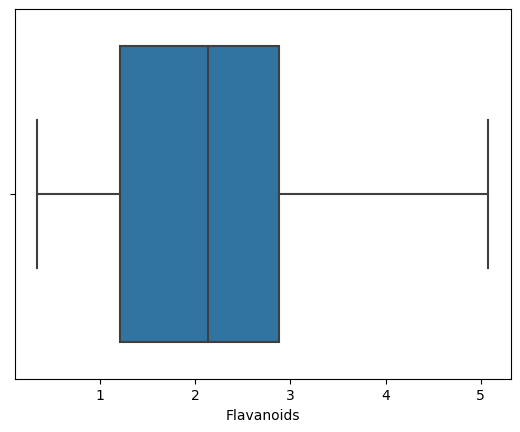

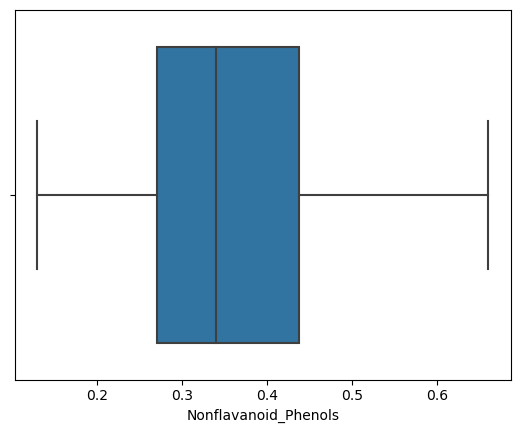

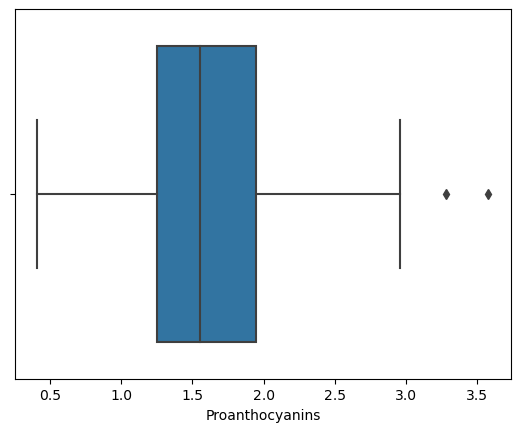

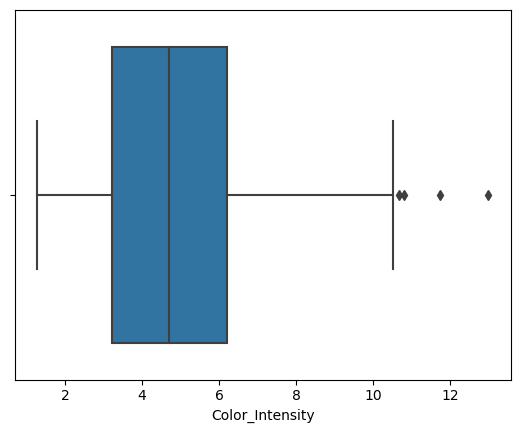

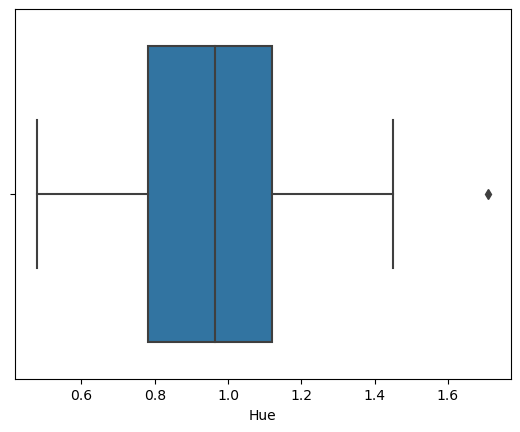

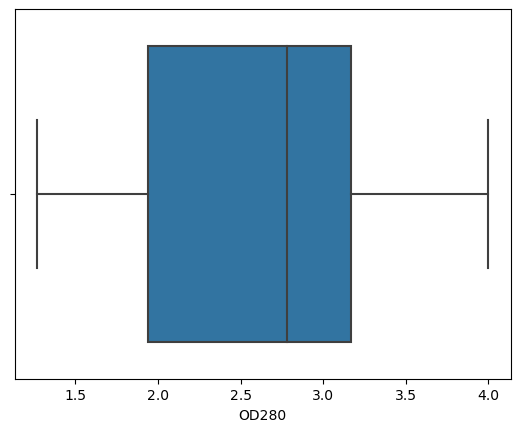

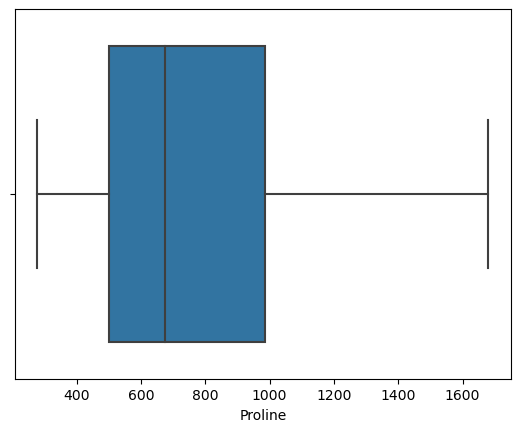

In [8]:
#There is no Categorical values so no needed to encode

for i in ds:
    sns.boxplot(x=ds[i])
    plt.show()

column contains Outliers : Malic_Acid, Ash, Ash_Alcanity, Magnesium, Proanthocyanins, Color_Intensity, Hue

# Treating Outliers

### 1. Malic_Acid

In [9]:
IQR=stats.iqr(ds.Malic_Acid,interpolation="midpoint")
IQR

1.46

In [10]:
Q1=ds.Malic_Acid.quantile(0.25)
Q3=ds.Malic_Acid.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.5874999999999999, 5.2725)

In [11]:
ds.loc[ds.Malic_Acid>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [12]:
ds.loc[ds.Malic_Acid<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [13]:
ds.loc[ds['Malic_Acid']>max_limit,'Malic_Acid']=np.median(ds.Malic_Acid)

In [14]:
ds.loc[ds.Malic_Acid>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


### 2. Ash

In [15]:
IQR=stats.iqr(ds.Ash,interpolation="midpoint")
IQR

0.34499999999999975

In [16]:
Q1=ds.Ash.quantile(0.25)
Q3=ds.Ash.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.6925000000000003, 3.0749999999999997)

In [17]:
ds.loc[ds.Ash>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [18]:
ds.loc[ds.Ash<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [19]:
ds.loc[ds['Ash']>max_limit,'Ash']=np.median(ds.Ash)

In [20]:
ds.loc[ds['Ash']<min_limit,'Ash']=np.median(ds.Ash)

In [21]:
ds.loc[ds.Ash>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [22]:
ds.loc[ds.Ash<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


### 3. Ash_Alcanity

In [23]:
IQR=stats.iqr(ds.Ash_Alcanity,interpolation="midpoint")
IQR

4.300000000000001

In [24]:
Q1=ds.Ash_Alcanity.quantile(0.25)
Q3=ds.Ash_Alcanity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(10.749999999999998, 27.950000000000003)

In [25]:
ds.loc[ds.Ash_Alcanity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
121,11.56,2.05,2.36,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


In [26]:
ds.loc[ds.Ash_Alcanity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,12.37,0.94,2.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [27]:
ds.loc[ds['Ash_Alcanity']>max_limit,'Ash_Alcanity']=np.median(ds.Ash_Alcanity)

In [28]:
ds.loc[ds['Ash_Alcanity']<min_limit,'Ash_Alcanity']=np.median(ds.Ash_Alcanity)

In [29]:
ds.loc[ds.Ash_Alcanity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [30]:
ds.loc[ds.Ash_Alcanity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


### 4. Magnesium

In [31]:
IQR=stats.iqr(ds.Magnesium,interpolation="midpoint")
IQR

19.0

In [32]:
Q1=ds.Magnesium.quantile(0.25)
Q3=ds.Magnesium.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(59.5, 135.5)

In [33]:
ds.loc[ds.Magnesium>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,19.5,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [34]:
ds.loc[ds.Magnesium<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [35]:
ds.loc[ds['Magnesium']>max_limit,'Magnesium']=np.median(ds.Magnesium)

In [36]:
ds.loc[ds.Magnesium>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


### 5. Proanthocyanins

In [37]:
IQR=stats.iqr(ds.Proanthocyanins,interpolation="midpoint")
IQR

0.7

In [38]:
Q1=ds.Proanthocyanins.quantile(0.25)
Q3=ds.Proanthocyanins.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.20000000000000018, 3.0)

In [39]:
ds.loc[ds.Proanthocyanins>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
95,12.47,1.52,2.20,19.0,98,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [40]:
ds.loc[ds.Proanthocyanins<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [41]:
ds.loc[ds['Proanthocyanins']>max_limit,'Proanthocyanins']=np.median(ds.Proanthocyanins)

In [42]:
ds.loc[ds.Proanthocyanins>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


### 6. Color_Intensity

In [43]:
IQR=stats.iqr(ds.Color_Intensity,interpolation="midpoint")
IQR

2.97

In [44]:
Q1=ds.Color_Intensity.quantile(0.25)
Q3=ds.Color_Intensity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.2350000000000003, 10.655000000000001)

In [45]:
ds.loc[ds.Color_Intensity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


In [46]:
ds.loc[ds.Color_Intensity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [47]:
ds.loc[ds['Color_Intensity']>max_limit,'Color_Intensity']=np.median(ds.Color_Intensity)

In [48]:
ds.loc[ds.Color_Intensity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


### 7. Hue

In [49]:
IQR=stats.iqr(ds.Hue,interpolation="midpoint")
IQR

0.3350000000000001

In [50]:
Q1=ds.Hue.quantile(0.25)
Q3=ds.Hue.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.2799999999999998, 1.6225000000000003)

In [51]:
ds.loc[ds.Hue>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
115,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


In [52]:
ds.loc[ds.Hue<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [53]:
ds.loc[ds['Hue']>max_limit,'Hue']=np.median(ds.Hue)

In [54]:
ds.loc[ds.Hue>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


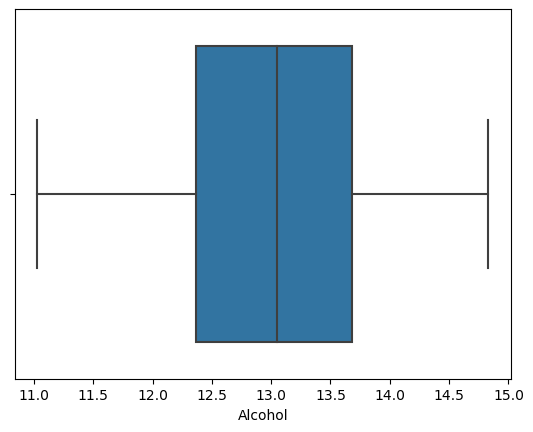

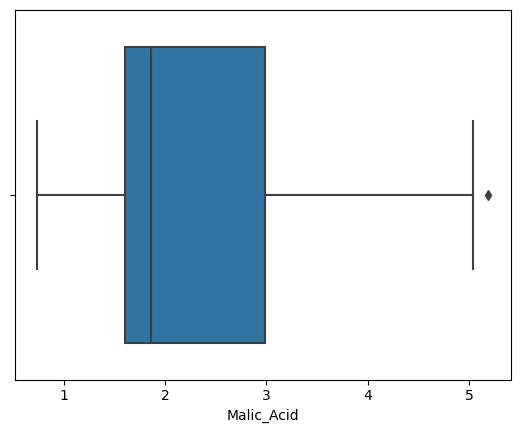

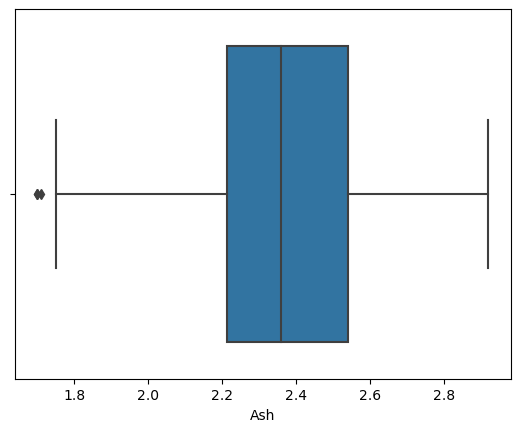

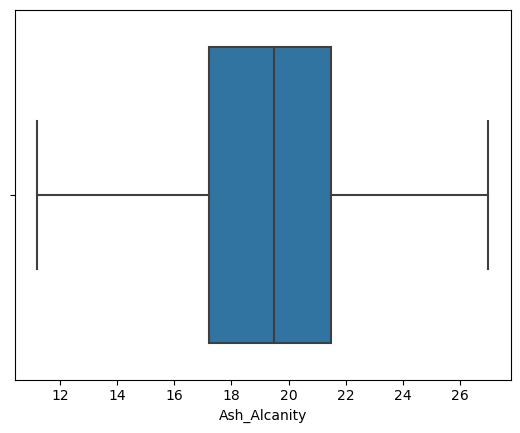

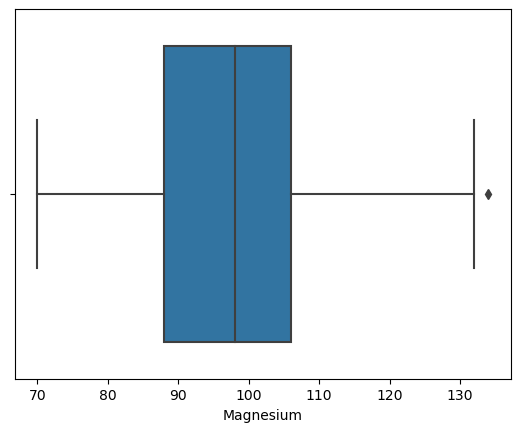

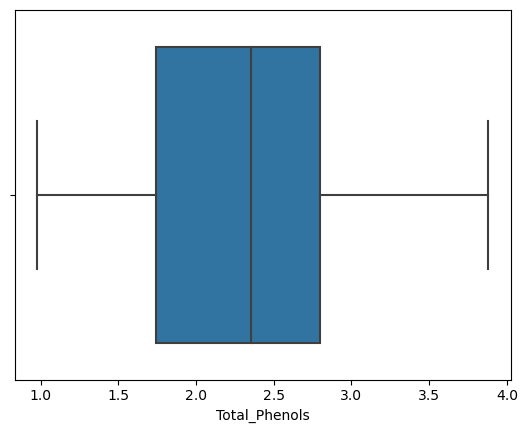

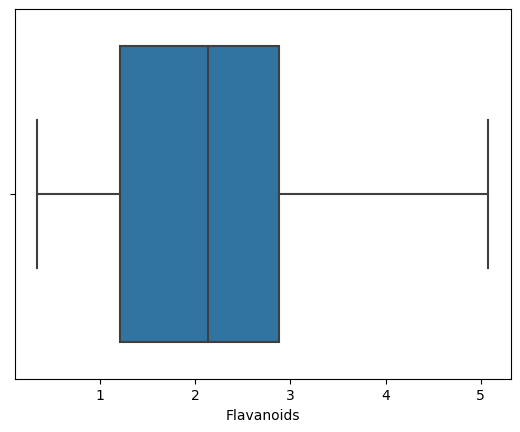

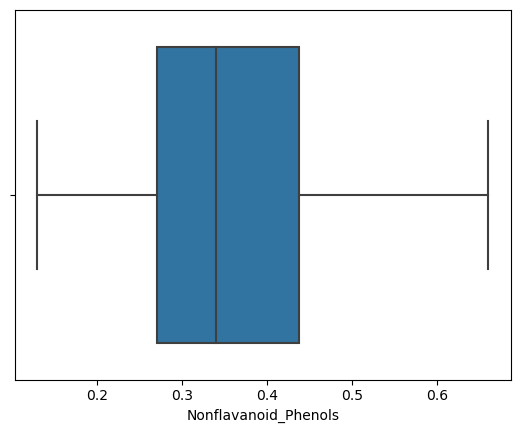

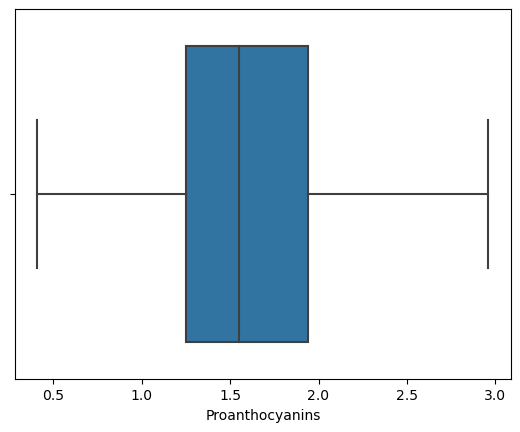

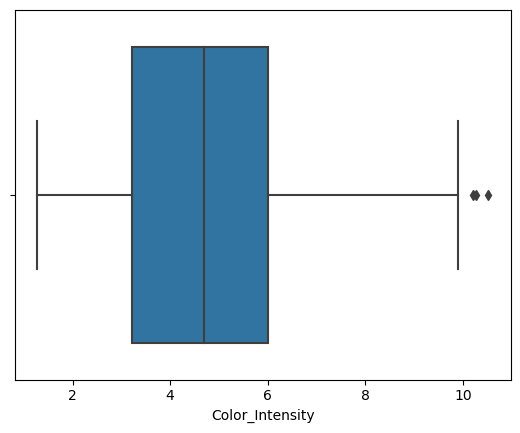

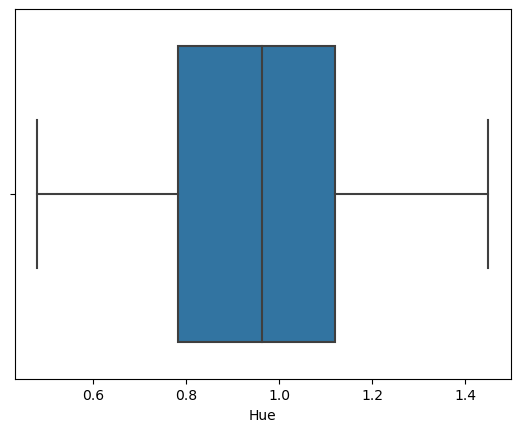

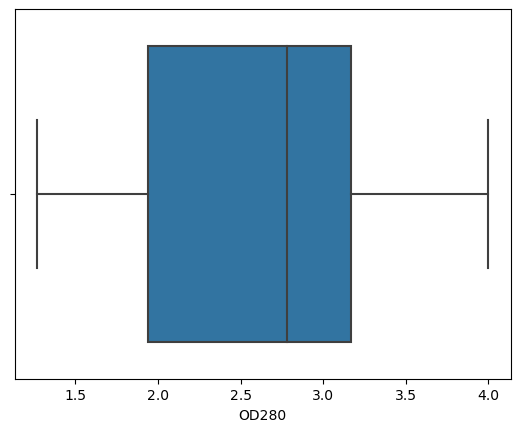

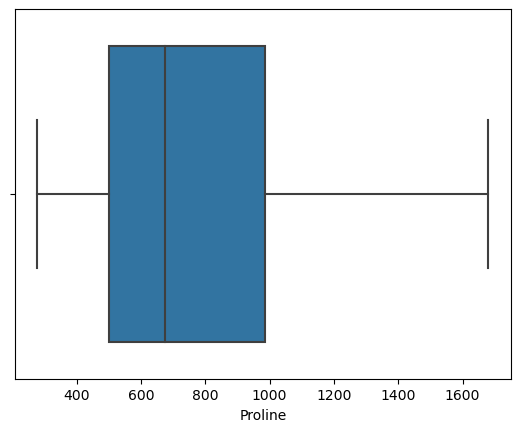

In [55]:
#Plotting Outlier Removed data

for i in ds:
    sns.boxplot(x=ds[i])
    plt.show()

# KMeans Clustering

In [56]:
from sklearn.cluster import KMeans

In [57]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(ds)
    wcss.append(kmeans.inertia_)

C:\Users\sribin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
wcss

[17582160.26138788,
 4534368.64195865,
 2361997.435345081,
 1324466.3899364572,
 908474.1951832977,
 639445.197786947,
 403886.97248549917,
 315180.53323319525,
 262154.0431208886,
 210888.71605277347,
 180453.9151583559,
 159644.26900433618]

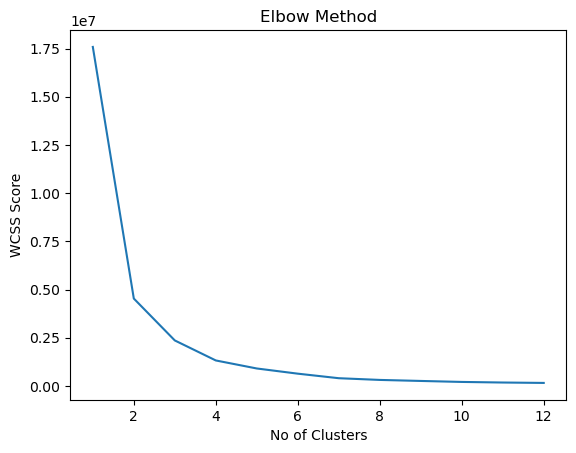

In [59]:
#Plotting no.of Clusters vs wcss

plt.plot(range(1,13),wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS Score")
plt.show()

In [60]:
#From Elbow method optimum no of Clusters=4

In [61]:
#KMeans

kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(ds)

In [62]:
y_kmeans

array([2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 3, 0, 3, 0, 3, 3, 0,
       3, 3, 0, 0, 2, 3, 3, 2, 2, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2,
       2, 0])

In [63]:
#Find the Silhouette_score

from sklearn.metrics import silhouette_score

silhouette_sc=silhouette_score(ds,y_kmeans)
print("silhouette score = ",silhouette_sc )

silhouette score =  0.5628380026862235


# Agglomerative Clustering

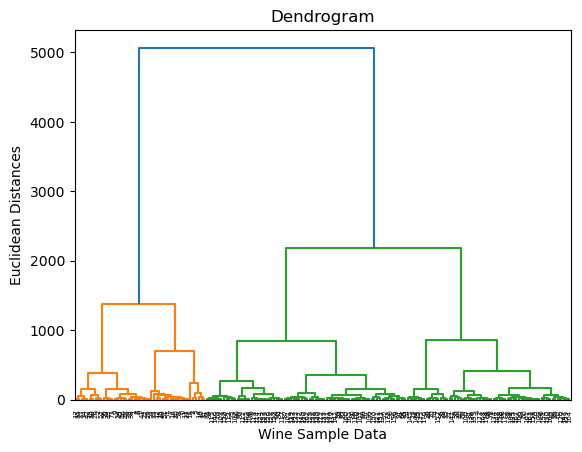

In [64]:
#Finding the optimal number of clusters using the dendrogram  

import scipy.cluster.hierarchy as shc 

dendro = shc.dendrogram(shc.linkage(ds, method="ward"))  
plt.title("Dendrogram")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Wine Sample Data")  
plt.show()  

In [65]:
#training the hierarchical model on dataset  

from sklearn.cluster import AgglomerativeClustering  

Agg_clust= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_Agg_clust= Agg_clust.fit_predict(ds)  

In [66]:
y_Agg_clust

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [67]:
#Find the Silhouette_score

from sklearn.metrics import silhouette_score

silhouette_sc=silhouette_score(ds,y_Agg_clust)
print("silhouette score = ",silhouette_sc )

silhouette score =  0.6577293788570644


# PCA Clustering

In [68]:
#Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [69]:
scaled_ds=sc.fit_transform(ds)
scaled_ds

array([[ 1.51861254, -0.5476409 ,  0.27397068, ...,  0.392826  ,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.47949003, -0.90162087, ...,  0.43811587,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.08518858,  1.24687403, ...,  0.34753614,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.95446953, -0.4151692 , ..., -1.6452181 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.30911287,  0.03074484, ..., -1.59992823,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.77922444,  1.5306375 , ..., -1.55463836,
        -1.42894777, -0.59516041]])

In [70]:
scaled_ds=pd.DataFrame(scaled_ds,columns=ds.columns)

In [71]:
type(scaled_ds)

pandas.core.frame.DataFrame

In [72]:
scaled_ds.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.547641,0.273971,-1.254501,2.322386,0.808997,1.034819,-0.659563,1.344130,0.352805,0.392826,1.847920,1.013009
1,0.246290,-0.479490,-0.901621,-2.712903,0.111335,0.568648,0.733629,-0.820719,-0.540944,-0.250988,0.438116,1.113449,0.965242
2,0.196879,0.085189,1.246874,-0.260136,0.193225,0.808997,1.215533,-0.498407,2.314663,0.371973,0.347536,0.788587,1.395148
3,1.691550,-0.313981,0.557734,-0.856755,1.175915,2.491446,1.466525,-0.981875,1.138825,1.387878,-0.422392,1.184071,2.334574
4,0.295700,0.309113,2.057627,0.535356,1.585369,0.808997,0.663351,0.226796,0.466917,-0.279740,0.392826,0.449601,-0.037874


In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=10)

In [81]:
x_pca=pca.fit_transform(scaled_ds)

In [82]:
x_pca

array([[ 3.45975652, -1.65805294,  0.08291857, ...,  0.47025826,
         0.80570717,  0.80191076],
       [ 2.36719025,  0.26303061, -1.96924322, ..., -0.72492267,
        -0.59821845,  0.57328834],
       [ 2.58686655, -1.01470896,  1.09278357, ...,  0.84100892,
        -1.01375098, -0.05083796],
       ...,
       [-2.61187211, -3.24634472, -1.15462749, ...,  0.44983108,
         0.12356208, -0.83225575],
       [-2.31988657, -2.7097847 , -0.62905284, ...,  0.24366336,
         0.20763504, -0.08273939],
       [-3.25845755, -2.98124585,  0.96846968, ..., -0.24374747,
         0.54030807, -0.25307921]])

In [84]:
x_pca.shape

(178, 10)

In [85]:
pca.explained_variance_ratio_

array([0.37086336, 0.20332931, 0.0954301 , 0.0694187 , 0.06023354,
       0.04419032, 0.03910542, 0.02895931, 0.02478652, 0.02137276])

In [86]:
np.sum(pca.explained_variance_ratio_)

0.9576893475927889

# DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan=DBSCAN(eps=8, min_samples=3)

In [ ]:
y_dbscan=dbscan.fit_predict(ds)

In [ ]:
y_dbscan

In [ ]:
#y_dbscan = DBSCAN(eps = 20, min_samples = 5).fit(ds)

In [ ]:
#y_dbscan.labels_

In [ ]:
set(y_dbscan)

In [ ]:
from collections import Counter

Counter(y_dbscan)

In [ ]:
#Print the no of Clusters and Outliers

clust = len(Counter(y_dbscan))
print(f"Number of clusters: {clust}")
print(f"Number of outliers: {Counter(y_dbscan)[-1]}")

In [ ]:
#Find the Silhouette_score

from sklearn.metrics import silhouette_score

silhouette_sc=silhouette_score(ds,y_dbscan)
print("silhouette score = ",silhouette_sc )